In [13]:
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

In [14]:
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
	best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	best_eval = objective(best)
	curr, curr_eval = best, best_eval
	scores = list()

	for i in range(n_iterations):
		candidate = curr + randn(len(bounds)) * step_size
		candidate_eval = objective(candidate)

		if candidate_eval < best_eval:
			# Nuevo mejor punto
			best, best_eval = candidate, candidate_eval

			#Nuevo valor dentro del array de puntajes
			scores.append(best_eval)
			# Progreso por cada iteracion correcta
			print('>%d f(%s) = %.5f' % (i, best, best_eval))

		#Diferencia entre el punto candidato y el punto de evaluacion
		diff = candidate_eval - curr_eval

		#'Temperatura' para la epoca en curso
		t = temp / float(i + 1)

		#Criterio de aceptacion
		metropolis = exp(-diff / t)

		#Verifica si mantiene o no el nuevo punto encontrado
		if diff < 0 or rand() < metropolis:
			#En caso de ser verdadero el predicado anterior, se setea el nuevo punto
			curr, curr_eval = candidate, candidate_eval

	return [best, best_eval, scores]

In [15]:
#Funcion objetivo
def objective(x):
	return x[0]**2.0

In [16]:
seed(1)

bounds = asarray([[-5.0, 5.0]])

#Iteraciones
n_iterations = 1000

# Largo de cada paso
step_size = 0.1

#'Temperatura' inicial
temp = 10

best, score, scores = simulated_annealing(
	objective,
	asarray([[-5.0, 5.0]]), # Input array inicial
	1000, #Numero de iteraciones
	0.1, # Largo de cada paso
	10 #'Temperatura' inicial
)

>34 f([-0.78753544]) = 0.62021
>35 f([-0.76914239]) = 0.59158
>37 f([-0.68574854]) = 0.47025
>39 f([-0.64797564]) = 0.41987
>40 f([-0.58914623]) = 0.34709
>41 f([-0.55446029]) = 0.30743
>42 f([-0.41775702]) = 0.17452
>43 f([-0.35038542]) = 0.12277
>50 f([-0.15799045]) = 0.02496
>66 f([-0.11089772]) = 0.01230
>67 f([-0.09238208]) = 0.00853
>72 f([-0.09145261]) = 0.00836
>75 f([-0.05129162]) = 0.00263
>93 f([-0.02854417]) = 0.00081
>144 f([0.00864136]) = 0.00007
>149 f([0.00753953]) = 0.00006
>167 f([-0.00640394]) = 0.00004
>225 f([-0.00044965]) = 0.00000
>503 f([-0.00036261]) = 0.00000
>512 f([0.00013605]) = 0.00000


In [17]:
print('--------------------')
print('Valor de la funcion')
print('f(%s) = %f' % (best, score))
print('--------------------')

--------------------
Valor de la funcion
f([0.00013605]) = 0.000000
--------------------


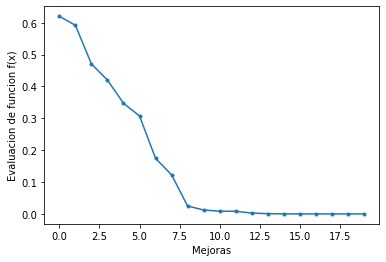

In [18]:
pyplot.plot(scores, '.-')
pyplot.xlabel('Mejoras')
pyplot.ylabel('Evaluacion de funcion f(x)')
pyplot.show()